<a href="https://colab.research.google.com/github/cairoegito/Fraudes-Bancarias-com-Machine-Learning/blob/main/Detec%C3%A7%C3%A3o_de_Fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJETIVO DE NEGÓCIO**

Identificar possíveis compras fraudulentas para evitar prejuízos financeiros.  O objetivo deste projeto é detectar comportamentos não usuais, ou seja, transações atípicas em comparação às outras e para isso usaremos técnicas exploratória de dados e de Machine Learning. Esse problema cada vez mais recorrente e real conforme as facilidades tecnológicas se intensificam pode dar e vem dando diversos prejuízos financeiros e similares, tais como as notícias já apontam:

 https://exame.com/invest/minhas-financas/golpes-bancarios-disparam-e-devem-gerar-prejuizos-de-r-25-bilhoes-neste-ano/

## **Importando Bibliotecas e dados**

In [2]:
#Importando bibliotecas
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score
from sklearn.metrics import plot_confusion_matrix


In [3]:
#Importando Dataset
df = pd.read_csv("/content/drive/MyDrive/Fraudes TERA - Projeto/creditcard.csv.zip" , sep=",")

## **Análise exploratória**

In [4]:
#Checando primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
nRow, nCol = df.shape
print(f'Nosso dataset possui {nRow} linhas e {nCol} colunas')


Nosso dataset possui 284807 linhas e 31 colunas


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.duplicated().sum()

1081

In [ ]:
df = df.drop_duplicates()

In [ ]:
lista=["Not Fraud","Frauds"]
fraud_or_not = df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
fig = px.pie(values=df['Class'].value_counts(), names=lista , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Porcentagem entre Fraudes & Transações genuínas")
fig.show()

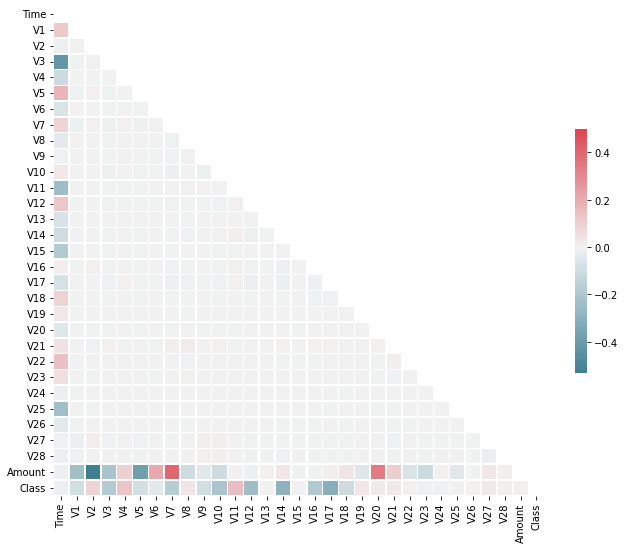

In [ ]:
corr=df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

As variáveis 12,14 e 17 são as que possuem maiores correlações com a nossa variável de interesse preditivo, a Class, que indica se determinada compra é fraudulenta ou não.

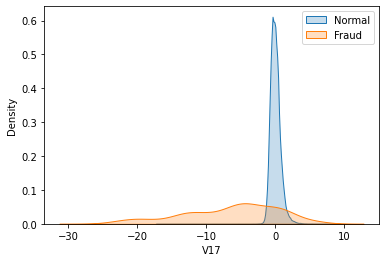

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df[df['Class'] == 0]['V17'], label="Normal", shade=True)
sns.kdeplot(data=df[df['Class'] == 1]['V17'], label="Fraud", shade=True)
plt.legend()
plt.show()

O comportamento da variável V17 em relação a compras fraudulentas é irregular, o que demonstra certa imprecição em relação as compras com fraudes. Entretanto, a mesma se comporta com maior normalidade referente a compras genuínas 

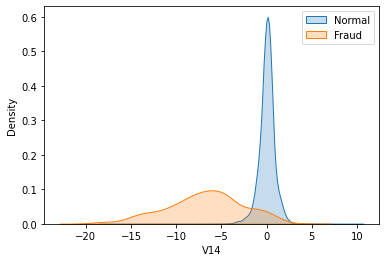

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df[df['Class'] == 0]['V14'], label="Normal", shade=True)
sns.kdeplot(data=df[df['Class'] == 1]['V14'], label="Fraud", shade=True)
plt.legend()
plt.show()

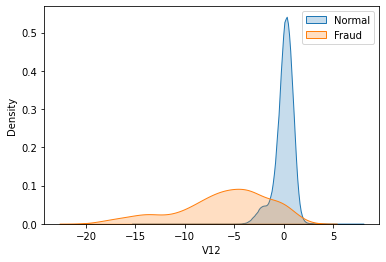

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df[df['Class'] == 0]['V12'], label="Normal", shade=True)
sns.kdeplot(data=df[df['Class'] == 1]['V12'], label="Fraud", shade=True)
plt.legend()
plt.show()

Aqui notamos que as compras fraudulentas tendem a ter um comportamento mais imprevisível, o que pode ser aleatório, afinal estão tentando lucro financeiro em uma situação vantajosa para os mesmos através de irregularidade.As compras genuínas são executadas sem problemas e fins criminosos externos, então pode-se categorizar por descontos, bônus de milhas e promoções da bandeira do cartão, dentre outros. Como as fraudulentas são ilegais, talvez os fraudadores busquem alternativas distintas para burlar o sistema, o que faz com o que comportamento seja mais difícil de padronizar.

Text(0.5, 1.0, 'Número de transações genuínas por usuários')

<Figure size 576x288 with 0 Axes>

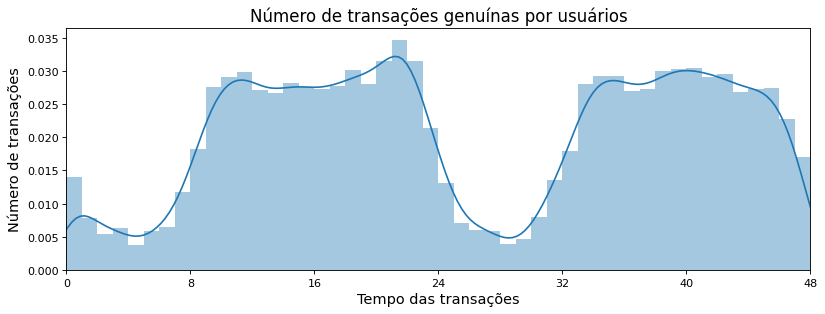

In [8]:
plt.figure(figsize=(8,4))
Nofraud_df = df[df['Class']==0]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_df[ 'Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,8))
plt.xlim([0,48])
plt.xlabel('Tempo das transações',fontsize=13)
plt.ylabel('Número de transações',fontsize=13)
plt.title('Número de transações genuínas por usuários',fontsize=15)

Text(0.5, 1.0, 'Número de transações fraudulentas por usuários')

<Figure size 576x288 with 0 Axes>

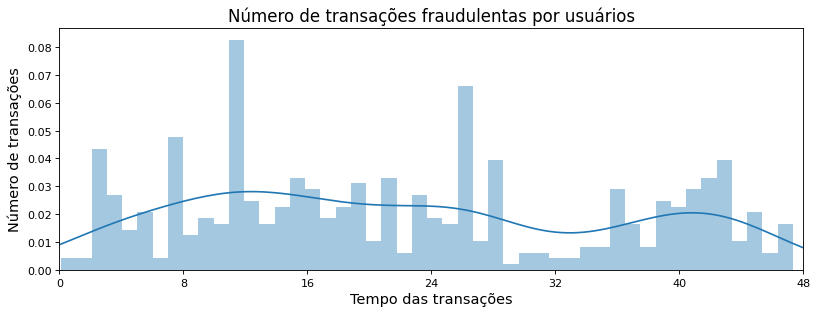

In [9]:
plt.figure(figsize=(8,4))
Fraud_df = df[df['Class']==1]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Fraud_df['Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,8))
plt.xlim([0,48])
plt.xlabel('Tempo das transações',fontsize=13)
plt.ylabel('Número de transações',fontsize=13)
plt.title('Número de transações fraudulentas por usuários',fontsize=15)

Notemos que em relação a horários o nosso diagnóstico muda. Nesse caso, as compras fraudulentas e genuínas apresentam comportamentos inversos. Enquanto as primeiras são realizadas em sua maioria no período de madrugada e início de manhã, as genuínas caem durante esse mesmo intervalo e voltam a crescer somente com o passar do dia (horário comercial)

## **Data Scaling**

In [ ]:
#Como os dados não estão na mesma casa vamos normalizar a variável amount
std_scaler = StandardScaler()
df['Scaled_Amount']=std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [ ]:
df.drop(['Amount','Time'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Scaled_Amount'],
      dtype='object')

In [ ]:
#Fazendo redução de dimensionalidade de acordo com a correlação com a variável preditiva
df = df[['V12','V14','V17','V16','V10','V3','V7','Scaled_Amount','Class']]


In [ ]:
df.head()

,V12,V14,V17,V16,V10,V3,V7,Scaled_Amount,Class
0,-0.617801,-0.311169,0.207971,-0.470401,0.090794,2.536347,0.239599,0.244200,0
1,1.065235,-0.143772,-0.114805,0.463917,-0.166974,0.166480,-0.078803,-0.342584,0
2,0.066084,-0.165946,1.109969,-2.890083,0.207643,1.773209,0.791461,1.158900,0
3,0.178228,-0.287924,-0.684093,-1.059647,-0.054952,1.792993,0.237609,0.139886,0
4,0.538196,-1.119670,-0.237033,-0.451449,0.753074,1.548718,0.592941,-0.073813,0


In [ ]:
df.describe().round(2).style.background_gradient()


,V12,V14,V17,V16,V10,V3,V7,Scaled_Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
std,0.990000,0.950000,0.840000,0.870000,1.080000,1.510000,1.230000,1.000000,0.040000
min,-18.680000,-19.210000,-25.160000,-14.130000,-24.590000,-48.330000,-43.560000,-0.350000,0.000000
25%,-0.410000,-0.430000,-0.480000,-0.470000,-0.540000,-0.890000,-0.550000,-0.330000,0.000000
50%,0.140000,0.050000,-0.070000,0.070000,-0.090000,0.180000,0.040000,-0.270000,0.000000
75%,0.620000,0.490000,0.400000,0.520000,0.450000,1.030000,0.570000,-0.040000,0.000000
max,7.850000,10.530000,9.250000,17.320000,23.750000,9.380000,120.590000,102.250000,1.000000


# **Machine Learning e modelos selecionados**

In [ ]:
#Balanceando para ajustar modelo
from imblearn.over_sampling import SMOTE 
X = df.drop('Class', axis = 1)
y = df['Class']

smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

fig = px.pie(values=y_resampled.value_counts(), width=800, height=400, title="Data Balance",color_discrete_sequence=["skyblue","black"])
fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 0)

**Naive Bayes**

Mesmo o modelo Gausiano assumindo que não há ruído ou praticamente isso, vamos testá-lo por sua capacidade com interpolação de dados, ou seja, de fazer dada previsão o mais confiável possível fora do intervalo de certeza e ajustar bem o modelo a esses pontos

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive=GaussianNB()
naive.fit(X_train , y_train)

GaussianNB()

In [ ]:
naive.score(X_train , y_train).round(4)

0.9154

In [ ]:
naive_preds=naive.predict(X_test)

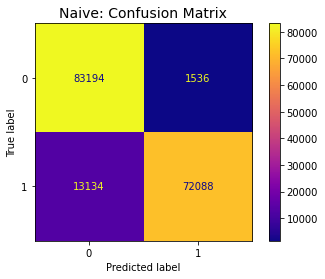

In [ ]:
#Plotando matriz de confusão
plot_confusion_matrix(naive, X_test, y_test, cmap='plasma')
plt.title('Naive: Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(f'\t\tNaive Model has A:- \n\nAccuracy: {accuracy_score(y_test,naive_preds).round(4)}\t\trecall_Score: {recall_score(y_test,naive_preds).round(4)}\nPrecision_score: {precision_score(y_test,naive_preds).round(4)}\t\tF1-score equals: {f1_score(y_test,naive_preds).round(4)}')

		Naive Model has A:- 

Accuracy: 0.9137		recall_Score: 0.8459
Precision_score: 0.9791		F1-score equals: 0.9076


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, naive_preds))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     84730
           1       0.98      0.85      0.91     85222

    accuracy                           0.91    169952
   macro avg       0.92      0.91      0.91    169952
weighted avg       0.92      0.91      0.91    169952



**Decision Tree**

Vamos utilizar agora o usual Decision Tree para buscar aprimoramento do modelo e visando mais camadas de tomadas de decisão, tomando cuidado para não termos um overfiting

In [ ]:
from sklearn.tree  import DecisionTreeClassifier

In [ ]:
dt =DecisionTreeClassifier(max_features=7 , max_depth=5)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5, max_features=7)

In [ ]:
dt.score(X_train , y_train).round(4)

0.9362

In [ ]:
DT_preds=dt.predict(X_test)

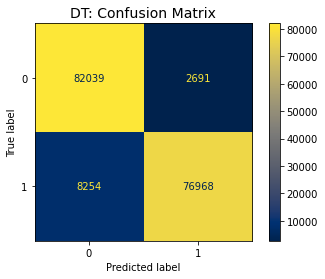

In [ ]:
#Fazendo matriz de confusão
plot_confusion_matrix(dt, X_test, y_test,cmap='cividis')
plt.title('DT: Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(f'\t\tDT Model has A:- \n\nAccuracy: {accuracy_score(y_test,DT_preds).round(4)}\t\trecall_Score: {recall_score(y_test,DT_preds).round(4)}\nPrecision_score: {precision_score(y_test,DT_preds).round(4)}\t\tF1-score equals: {f1_score(y_test,DT_preds).round(4)}')

		DT Model has A:- 

Accuracy: 0.9356		recall_Score: 0.9031
Precision_score: 0.9662		F1-score equals: 0.9336


In [ ]:
print(classification_report(y_test, DT_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     84730
           1       0.97      0.90      0.93     85222

    accuracy                           0.94    169952
   macro avg       0.94      0.94      0.94    169952
weighted avg       0.94      0.94      0.94    169952



**XGBoost**

Agora vamos utilizar um modelo de classificação baseado em Boosting, técnica diferente da utilizada no Decision Tree pois considera mais fatores relevantes durante o processo.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train , y_train)

XGBClassifier()

In [ ]:
xgb.score(X_train , y_train).round(4)

0.9518

In [ ]:
xgb_preds=xgb.predict(X_test)

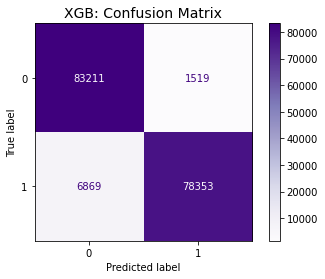

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test,cmap='Purples')
plt.title('XGB: Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(f'\t\tXGB Model has A:- \n\nAccuracy: {accuracy_score(y_test, xgb_preds).round(4)}\t\trecall_Score: {recall_score(y_test,xgb_preds).round(4)}\nPrecision_score: {precision_score(y_test,xgb_preds).round(4)}\t\tF1-score equals: {f1_score(y_test,xgb_preds).round(4)}')

		XGB Model has A:- 

Accuracy: 0.9506		recall_Score: 0.9194
Precision_score: 0.981		F1-score equals: 0.9492


**Comparação final dos modelos**

In [ ]:
model_comparison={}
model_comparison['Decision Tree']=[accuracy_score(y_test,DT_preds),f1_score(y_test,DT_preds,average='weighted'),precision_score(y_test,DT_preds),recall_score(y_test,DT_preds)]
model_comparison['Naive']=[accuracy_score(y_test,naive_preds),f1_score(y_test,naive_preds,average='weighted'),precision_score(y_test,naive_preds),recall_score(y_test,naive_preds)]        
model_comparison['XGboost']=[accuracy_score(y_test,xgb_preds),f1_score(y_test,xgb_preds,average='weighted'),precision_score(y_test,xgb_preds),recall_score(y_test,xgb_preds)]    

In [ ]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','precision','recall']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,precision,recall
XGboost,95.06%,95.06%,98.10%,91.94%
Decision Tree,93.56%,93.55%,96.62%,90.31%
Naive,91.37%,91.33%,97.91%,84.59%


Aqui notamos uma superioridade do modelo XGBoost, o que já era esperado aja visto que o mesmo é uma versão mais recente e aprimorada, por exemplo, de modelos como o Random Forest. O Recall, que seria a capacidade de prever novas classes é o mais aprimorado também e isso pode ser devido a ideia do boosting. As acurácias de todos os modelos são boas

## **Lei LGPD e SHAP**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 29.2 MB/s 


In [ ]:
import shap 


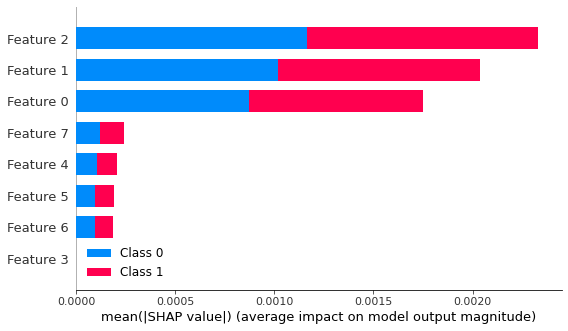

In [ ]:
#Explanando as influências das variáveis na predição (Decision Tree)
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

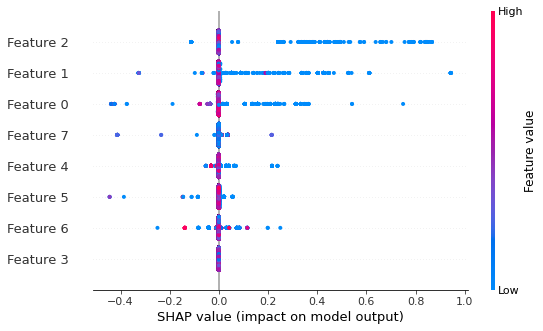

In [ ]:
shap.summary_plot(shap_values[1], X_train)


Aqui notamos que as variáveis 1 e 2 tendem a influenciar, por exemplo, para a compra ser determinada como uma  fraudulenta. Isso nos auxiliar em uma possível justificativa para o cliente de uma compra ser rejeitada, pois a lei LGPD garante ao consumidor, caso deseje, a justificativa da operadora e/ou empresa